# 4장. 모델 훈련 (Training Linear Models)

참고 사이트
- https://codingalzi.github.io/handson-ml2/notebooks/handson-ml2-04.html


## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 4.1 Linear Regression (선형 회귀)

#### 1) 선형 모델의 예측 : 입력 특성의 가중치의 합 + 편향(bias) 상수 -> 예측값을 만듦.
- 예측함수 만들기

#### 2) 모델 훈련 (= '모델 파라미터'를 훈련 세트에 가장 잘 맞도록 설정)
- 1. 모델을 측정
    - 회귀에 가장 많이 사용되는 성능 지표: RMSE
    - but, MSE를 이용해 더 간단히 측정 -> MSE 비용함수
    <br>
    <br>
- 2. MSE(θ) 함수를 최소화하는 θ값 찾기
    - MSE 비용함수를 최소화할 수 있는 θ값을 찾기 위한 방식 2가지.
         1. 정규방정식 (The Normal Equation)
         2. 경사하강법 (Gradient Descent)

### 4.1.1) The Normal Equation (정규방정식)
- θ값을 바로 얻을 수 있고 & 직접 계산하는 경우 활용하는 수학 공식

1. 선형처럼 보이는 데이터 생성

In [2]:
X = 2 * np.random.rand(100,1)             #X:특성 x1을 갖는 100개의 데이터
y = 4 + 3 * X + np.random.randn(100,1)    #y:100개의 레이블(선형함수에 noise(잡음)추가)

> - `np.random.rand(100,1)` : 0~1 사이의 **균일 분포(uniform distribution)**에서 무작위 추출  --> 100개의 숫자 & 1개의 열을 가진 배열
> - `np.random.randn(100,1)` : 평균이 0, 표준편차가 1인 **표준 정규 분포(standard normal distribution)**에서 무작위 추출(부동소수점) --> 100개의 행 & 1개의 열을 가진 배열 추출

In [3]:
linreg_data = np.c_[X,y]

> - `np.c_[X,y]` : 배열을 **수평**방향으로 결합 ex) X=[1,2,3],y=[4,5,6] 이라면 ➡️ 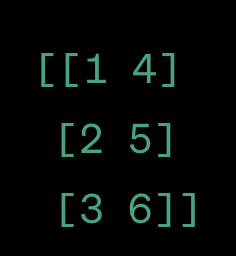
    - 각각 X에 따른 y의 값을 확인할 수 있음.

> ✔️참고) 배열을 **수직**방향으로 결합 : `np.r_[X,y]` - [X, y]이런 형태 ex) [1,2,3,4,5,6]

In [4]:
linreg_data[:5]

array([[0.74908024, 6.33428778],
       [1.90142861, 9.40527849],
       [1.46398788, 8.48372443],
       [1.19731697, 5.60438199],
       [0.31203728, 4.71643995]])

Saving figure generated_data_plot


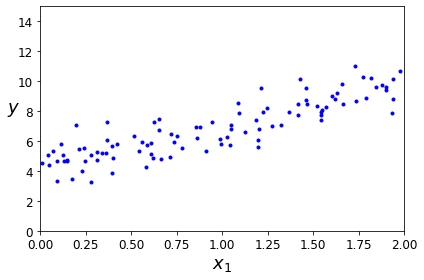

In [5]:
#특성 x1과 레이블 y의 관계를 그려보자. (무작위로 생성한 선형 데이터셋)

plt.plot(X, y, "b.")                         #"b.":파란색 & 점 (산점도 표시)
plt.xlabel("$x_1$", fontsize=18)             #x축 레이블 
plt.ylabel("$y$", rotation=0, fontsize=18)   #x축 레이블
plt.axis([0, 2, 0, 15])                      #x축, y축 구간 지정

save_fig("generated_data_plot")
plt.show()

> 기본적으로 선형 관계를 갖지만 noise로 인해 약간 퍼져있음.

2. 정규방정식을 이용하여 $\hat\theta$ 구하기

- 일반적으로 n개의 특성을 갖는 임의의 크기의 데이터셋 X가 주어졌을 때, $(\mathbf{X}^T \mathbf{X})^{-1}$의 역행렬이 존재하고, 일정 시간 내에 계산이 가능할 때 <br> -> 최적의 파라미터 조합 $\boldsymbol{\hat\theta}$을 정규방정식으로 구할 수 있다.

$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [6]:
X_b = np.c_[np.ones((100,1)), X]   #모든 샘플에 x0=1을 추가 ⬅️ 절편인 θ0을 고려하기 위해

> `np.ones((100,1))` : 모든 요소가 1로 채워진 100개의 행과 1개의 열로 이루어진 배열

> `X_b`: 훈련 세트에 **편향(0번 열(x0)에 1)이 추가**된 배열 (x0=1 추가)


(사이킷런을 사용할 때는 모델이 알아서 추가해줌)

In [7]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [8]:
# 위의 코드와 관련된 간단 예시

a = np.ones((4,1))
b = np.random.rand(4,1)

ab_combined = np.c_[a,b]
ab_combined

array([[1.        , 0.7948113 ],
       [1.        , 0.50263709],
       [1.        , 0.57690388],
       [1.        , 0.49251769]])

- Numpy 선형대수 모듈인 `np.linalg` 사용하여 $\boldsymbol{\hat\theta} = [\theta_0, \theta_1]$를 구해보자.

    - `inv()` 함수: 역행렬 계산
    - `dot()` 함수: 행렬 곱셈

$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [9]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

> - theta_best: $\boldsymbol{\hat\theta}$ -> $\boldsymbol{\hat\theta} = [\theta_0, \theta_1]$ 형태
> - 코드 설명:
    - $(\mathbf{X}^T \mathbf{X})^{-1}$ : `inv(X_b.T.dot(X_b))`
    - $\mathbf{X}^T \mathbf{y}$ : `dot(X_b.T).dot(y)`
    
> 사용한 함수: $y=4+3x1+ 가우시안잡음 $

In [10]:
#정규방정식으로 계산된 ^θ=[θ0, θ1] 
theta_best

array([[4.21509616],
       [2.77011339]])

> 기대한 값: $\theta_0$=4, $\theta_1$=3 
<br>➡️ but, 잡음 때문에 정확히 재현x

3. 계산된 $\boldsymbol{\hat\theta}$을 사용해 예측해보자.
- `x1=0` & `x2=2` 일때의 예측값($\hat{y}$) 구하기.
    - -> 이 때는 단순한 **행렬 곱셈에 불과** : 
    $\hat{y} =  \mathbf{X}\, \boldsymbol{\hat{\theta}}$

In [11]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #여기서도 모든 샘플에 x0=1 추가해야 함
X_new_b

array([[1., 0.],
       [1., 2.]])

- 예측값을 구해보자.

In [12]:
#예측값
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

- 그래프로 나타내보자 ➡️ $\theta_0$:절편, $\theta_1$:기울기로 설정

Saving figure linear_model_predictions_plot


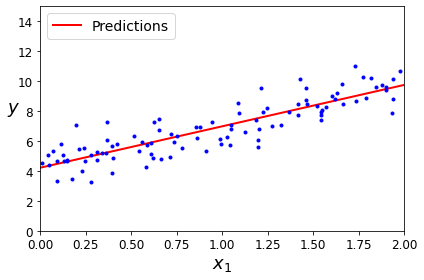

In [13]:
#그래프 (선형 회귀 모델의 예측)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")  #예측값(θhat)을 이용한 직선

plt.plot(X,y, "b.")  #파란 점의 형태로 예측값 구하기 전 그래프의 산점도  
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(loc="upper left", fontsize=14)  #범례 지정
plt.axis([0, 2, 0, 15])                    #x축 구간:0~2, y축 구간:0~15

save_fig("linear_model_predictions_plot")
plt.show()

#### 사이킷런의 `[LinearRegression] 모델`을 이용하여 선형 회귀 수행

- LinearRegression 클래스의 계산 방식 : **특잇값 분해(SVD)**를 이용 -> 무어-펜로즈의 **유사 역행렬$\mathbf{X}^+$** 활용하여 파라미터 $\hat{\theta}$ 구하기
     - 함수: $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$ 
     
     <br>
     <br>
     
> - 특잇값 분해(SVD): 행렬을 3개의 행렬의 곱(U, $\Sigma$, $\mathbf{V}^T$ )으로 분해

> - 유사 역행렬($\mathbf{X}^+$)
    - 역행렬이 존재하지 않거나 계산이 어려울 때 사용.
    - 유사 역행렬을 구할 때는 일반적으로 SVD 방식을 이용 : 원래 행렬 분해 -> 알고리즘이 대각행렬($\Sigma$)을 구함 -> 낮은 임계값보다 작은 수를 모두 0으로 바꿈 -> 0이 아닌 모든 값을 역수로 치환 -> 이 행렬을 전치
    - 정규방정식보다 효율적

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #객체 
lin_reg.fit(X,y)             #훈련

LinearRegression()

In [15]:
#절편(θ0), 기울기(θ1)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [16]:
lin_reg.predict(X_new) #X_new: x1=0 & x2=2 

array([[4.21509616],
       [9.75532293]])

> x1=0 & x2=2 일 때 수동으로 계산하여 구했던 예측값(3번에서)과 동일한 $\theta_0$, $\theta_1$ 예측값이 나왔다.

#### 🌎  `fit()`함수 대신 사용할 수 있는 2가지 방법
1. `scipy.linalg.lstsq()` 함수(least squares 최소제곱으로부터 파생)를 **직접 호출** 
-  $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$ 계산
    - (위에서 언급했던 것처럼 LinearRegression 모델이 위의 함수를 기반으로 하기 때문에)
- 이 과정에서 유사 역행렬을 구함

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

2. Numpy의 `np.linalg.pinv()`함수로 **유사 역행렬**을 구하여 계산하기
    - $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 4.2 경사하강법 (Gradient Descent)
- 특성 수 or 샘플 수가 많을 때는 정규방정식, SVD 방식의 LinearRegression 모델 사용 불가 
    - -> 대신, 경사하강법 사용 (훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합)
- 일반적인 최적화 알고리즘
- 기본 아이디어 : 비용함수를 최소화하기 위하여 **반복해서 파라미터를 조정**

- 진행 방식:<br>(임의의 값)무작위 초기화된 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 gradient(경사도)를 계산 <br> > **gradient가 감소**되는 방향으로 진행(=즉, `비용함수가 최소화`되는 방향) (반복적으로 수정) <br> > `gradient=0`인 지점인 최솟값에 도달
<br>
<br>
- 학습률 & 비용함수의 기울기는 비례 ➡️ 즉, 파라미터가 최솟값에 가까워질 때 -> 학습률이 점진적으로 줄어듦
    - 학습률 (learning rate) - 다음 step으로 이동하는 크기를 조절하는 매개변수 (파라미터 조정 비율)

- 종류 ('배치 크기'에 따라 분류)
    - 배치 경사하강법 : 전체 샘플이 훈련 대상
    - 확률적 경사하강법 : 배치크기=1
    - 미니배치 경사하강법 : 배치크기=2~수백 사이

### 4.2.1) 배치 경사하강법 (Batch Gradient Descent, BGD)
- **전체** 훈련 샘플을 대상으로 훈련 -> 즉, 매 스텝마다(epoch마다) gradient를 계산하여 파라미터 조정
    - epoch : 훈련 세트의 샘플 수에 대하여 한 번 완료하는 단위. (epoch 수 = 반복 횟수)
    <br><br>
- 경사하강법을 구현하기 위해 편도함수를 이용해 조금씩 파라미터를 조정
    - 파라미터 조정 방식 (경사하강법의 스텝을 구하는 식) :  $\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta}^{(\text{previous step})} - \eta\cdot \nabla_\theta \text{MSE}(\boldsymbol{\theta})$<br> ($\eta$ 는 학습률)
        - 스텝의 크기(이동거리) : $\eta\cdot \nabla_\theta \text{MSE}(\boldsymbol{\theta})$

- 비용 함수의 **gradient vector**(=기울기) : $\nabla_\theta \text{MSE}(\boldsymbol{\theta})
 = \frac{2}{m}\, \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})$


In [19]:
#위의 식을 구현

eta = 0.1            #학습률
n_iterations = 1000  #반복 횟수
m = 100              #훈련 샘플 수

theta = np.random.randn(2,1)  #무작위 초기화(표준정규분포를 따르는 임의의 값)된 θ0과 θ1

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #gradient vector
    theta = theta - eta * gradients                 #파라미터 업데이트

In [20]:
theta

array([[4.21509616],
       [2.77011339]])

> 정규방정식으로 계산했을 때와 동일 -> 경사하강법이 완벽히 작동

🔍 학습률에 따라 달라지는 파라미터 학습 과정 비교 그래프 그리기

In [21]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")   #훈련 세트의 산점도
    
    n_iterations = 1000    #반복횟수(epoch) 1000번
    for iteration in range(n_iterations):
        
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        #파라미터 조정 비율 지정
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        #theta_path 리스트에 변화하는 파라미터들을 모두 저장
        if theta_path is not None:
            theta_path.append(theta)
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])  #x축:0-2,y축:0-15
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)        

Saving figure gradient_descent_plot


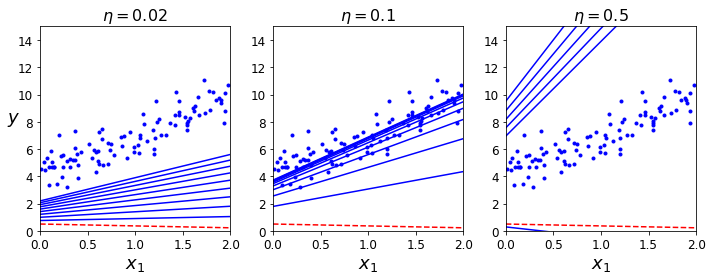

In [22]:
np.random.seed(42)
theta = np.random.randn(2,1) #무작위 초기화한 파라미터

plt.figure(figsize=(10,4))  #figure 사이즈 지정

#1.학습률=0.02인 경우
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

#2.학습률=0.1인 경우
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

#3.학습률=0.5인 경우
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

>- 학습률 너무 낮음 (왼) : 최적점에 도달하기까지 시간이 오래 걸림.
>-  학습률이 적당 (가운데) : 반복 몇 번 만에 최적점 도달.
>-  학습률 너무 높음 (오) : 스텝이 너무 크기 때문에 알고리즘이 널뛰어 발산.

> ✏️ `np.random.seed(42)` : Numpy의 라이브러리를 사용하여 난수 생성 시드(seed)를 설정하는 명령. (42는 별 의미 없다고 함. 일반적으로 통용되는 숫자)<br> 
> - seed는 난수를 생성할 때 사용하는 초깃값. 특정 seed를 사용하면 그 seed를 사용할 때마다 **동일한 난수 시퀀스가 생성**. (고정된 난수값이라고 생각하면 될 듯)<br>
     -> 실험의 재현성을 보장하고 코드의 예측 가능성을 높여줌 (즉, 난수를 일관적이게 유지시킴으로써 같은 코드를 여러 번 실행해도 같은 결과값이 나오도록 만들 때 사용)

> 참고) 사이킷런은 배치 하강법에 대한 선형 회귀 모델을 지원하지 않는다고 함. (176쪽에 잘 못 표기)

### 4.2.2) 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)
- 매 스텝에서 샘플 **무작위 선택** > 그 샘플 하나에 대한 gradient 계산
<br>
<br>
- 장점
    - 필요한 데이터⬇️ > 알고리즘 속도 ⬆️ (훈련 세트 큰 경우도 가능)
- 단점
    - "무작위성" -> 알고리즘 불안정 (학습하는 동안 파라미터의 동요가 심함 -> 최적치가 아니거나 발산 <br>
    - but, 불안정으로 인해 지역 최솟값 건너뛸 가능성이 배치 하강법보다 높음 <br>
    - but, 전역 최솟값에 다다르지 못함

➡️ 이러한 딜레마 해결법 : **학습률 점진적 감소 시키기** 
- 시작 시, 학습률 크게(빠른 수렴, 지역 최솟값 넘기도록) --> 학습률을 점차 줄이기 (전역 최솟값에 다다르도록)

- 학습 스케줄 (learning schedule, 매 반복에서 학습률을 결정하는 함수)을 올바르게 설정해야 한다.

📚 간단한 학습 스케줄을 이용한 확률적 경사 하강법을 구현해보자.

In [23]:
n_epochs = 50   #에포크 수(반복 횟수) -> 배치하강법보다 훨씬 적음
t0, t1 = 5, 50  #학습 스케줄 하이퍼파라미터

#학습 스케줄 정의
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) #파라미터 무작위 초기화

#확률적 경사 하강법
for epoch in range(n_epochs):
        #하나의 반복(에포크)에서 샘플 수만큼 되풀이
        for i in range(m):
            random_index = np.random.randint(m)   #범위 내에서 샘플 무작위로 한 개 추출
            xi = X_b[random_index:random_index+1] 
            yi = y[random_index:random_index+1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 

            eta = learning_schedule(epoch * m + i)

            theta = theta - eta * gradients   #파라미터 업데이트

In [24]:
theta

array([[4.20742938],
       [2.74264448]])

> 적은 에포크 수(50번)만으로 좋은 파라미터 값에 도달

➕ (응용) 위의 코드를 변경하여 **그래프로 표현해보자. (첫 20개의 스텝)**

In [25]:
theta_path_sgd = [] #파라미터 업데이트할 때마다 파라미터 값을 저장하는 리스트

m = len(X_b)
np.random.seed(42)

In [26]:
n_epochs = 50   #에포크 수(반복 횟수) 
t0, t1 = 5, 50  #학습 스케줄 하이퍼파라미터

#학습 스케줄 정의
def learning_schedule(t):
    return t0 / (t + t1)

Saving figure sgd_plot


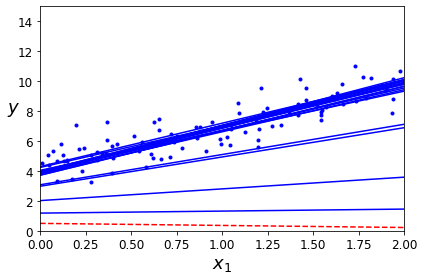

In [27]:
theta = np.random.randn(2,1)  #파라미터 - 무작위 초기화 

#에포크 수만큼(50번) 반복
for epoch in range(n_epochs):
    
    #하나의 에포크에서 샘플 수만큼 알고리즘이 반복 됨
    for i in range(m):
        
        #첫 에포크에서, 20번째 스텝까지 선형 그래프 (직선)
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        #파라미터 업데이트 
        random_index = np.random.randint(m)    #계산할 샘플 확률적(무작위) 선택
        xi = X_b[random_index:random_index+1]  #해당 샘플 적용
        yi = y[random_index:random_index+1]    #타겟 값(예측값) 할당
       
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) #학습 스케줄 함수 이용하여 학습률 조정
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)           #파라미터 업데이트될 때마다 리스트에 값 추가

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

In [28]:
theta

array([[4.21076011],
       [2.74856079]])

#### 사이킷런의 `SGDRegressor` 클래스
- SGD(확률적 경사 하강법)방식을 사용하여 제곱 오차 비용 함수를 최적화

In [29]:
from sklearn.linear_model import SGDRegressor

                    #에포크 최대 1000번, 허용오차=0.001(1e-3), 학습률=0.1, random_state(random seed와 같은 기능)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42) 
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

> `ravel()`: 2차원 배열을 1차원으로 평평하게 만들어주는 함수. 일반적으로 선형 회귀에서 타겟 변수는 1차원 벡터로 제공.

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

> 정규방정식으로 구한 값과 매우 유사

### 4.2.3) 미니배치 경사 하강법 (Mini-batch Gradient Descent, MGD)
- `미니배치`라 하는 작은 샘플 세트에 대해 gradient 계산
    - **스텝의 크기(보폭) 🟰 미니배치 사이즈**
<br><br>
- 장점
    - 미니배치 크게 어느 정도 크게 하면 > 파라미터 움직임이(파라미터 공간 안에서) SGD보다 덜 불규칙 <br>
        -> SGD보다 최솟값에 더 가까이 도달 (학습 스케줄 잘 활용하면)
    - 배치 경사 하강법보다 빠르게 학습(샘플 크기가 더 작으므로)
    - GPU 통해서 얻는 성능⬆️
    
- 단점
    - SGD에 비해 지역 최솟값에서 벗어날 확률⬇️

📚 미니배치 경사 하강법 구현

In [31]:
theta_path_mgd = []  #업데이트 되는 파라미터 순차적으로 담을 리스트

n_iterations = 50    #에포크 수(반복 횟수): 50번
minibatch_size = 20  #미니배치 크기: 20

np.random.seed(42)
theta = np.random.randn(2,1) #파라미터 무작위 초기화

t0, t1 = 200, 1000   #학습 스케줄 파라미터 

def learning_schedule(t): # t:미니배치의 개수(사이즈 아님)
    return t0 / (t + t1)

In [32]:
t = 0

for epoch in range(n_iterations):
    
    #에포크 넘어갈 때마다 훈련 데이터 섞음
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    #샘플 수만큼 반복 & step:미니배치 크기
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients 
        theta_path_mgd.append(theta)

In [33]:
theta

array([[4.25214635],
       [2.7896408 ]])

#### 📚 세 가지 경사 하강법의 파라미터 학습 경로 비교 그래프 (배치 & 확률적 & 미니배치)
- 파란색 : 배치 (BGD)
- 붉은색 : 확률적 (SGD)
- 초록색 : 미니배치 (MGD)

In [34]:
#각각 파라미터들을 담을 리스트 지정

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


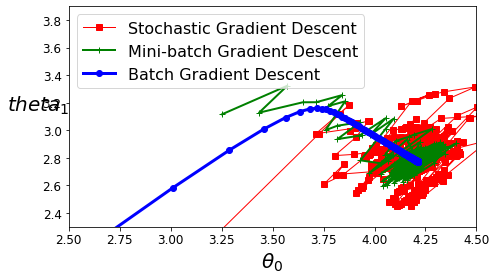

In [35]:
plt.figure(figsize=(7,4))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic Gradient Descent")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch Gradient Descent")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch Gradient Descent")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

>-  배치(파랑) - 실제로 최솟값에서 멈춤. but 많은 시간 소요
>- 미니배치(초) & 확률적(빨) - 최솟값 근처에서 맴돌고 있음. 적절한 학습 스케줄 사용하면 최솟값에 도달함.

## 4.3 다항 회귀 (Polynomial Regression)
- `선형 모델`을 사용하여 `비선형 데이터를 학습`할 수 있다.
    - 방법: 각 특성의 거듭제곱 -> 새로운 특성으로 추가 -> 확장된 특성으로 선형 모델을 훈련

#### 📚 예) 2차방정식으로 비선형 데이터 생성하기 (잡음 포함) 
$$y = 0.5\cdot x_1^2 + 2$$

In [36]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

- `np.random.rand(m,1)` - m개의 행, 1개의 열을 가지는 2차원 배열 생성 (범위: 0과 1 사이의 **균일 분포**)

Saving figure quardratic_data_plot


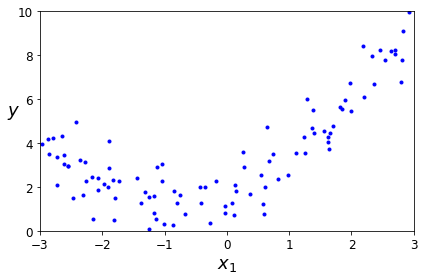

In [37]:
#산점도 그래프

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quardratic_data_plot")
plt.show()

> 확실히 직선은 이 데이터에 맞지 않을 것이다. (즉, 선형 회귀 모델을 바로 적용하면 좋은 모델을 얻을 수 없다.)

- 따라서, 다항 회귀 기법을 사용해보자.

#### 사이킷런의 `PolynomialFeatures` (다항 회귀 변환기)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

> - `degree=2` : 2차 다항식 사용해라.
> - `include_bias=False` : 편향(절편)을 변환된 어레이에 추가할지 여부 지정. 기본값은 True 이지만 여기서는 사용하지 않음. 이유는 변환된 어레이를 LinearRegression() 모델에서 사용할 예정이며, 거기서 입력 어레이는 편향을 사용하지 않기 때문임. (위의 참고 포스팅 속 글 인용)

> - 변환된 array `X_poly` : x1 특성과, __x1**2__인 새로운 특성(X[0])이 추가

In [39]:
#기존 array X

X[0]

array([-0.75275929])

> "x1" 특성만 존재

In [40]:
# 새로운 특성 (x1**2) 추가된 X_poly

X_poly[0]

array([-0.75275929,  0.56664654])

> `x1` & `x1**2` 특성 두 개 존재

##### 📚이제, 확장된 훈련 데이터(X_poly)에 선형 회귀 모델(`LinearRegression`)을 적용해보자.

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [42]:
#절편, 기울기

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

> 절편에 대한 파라미터 ($\theta_0$) <br>
> 기울기 파라미터 ($\theta_1$ & $\theta_2$) ⬅️ 특성 $x_1$ & $x_1^2 $ 에 대한 파라미터

Saving figure quadratic_predictions_plot


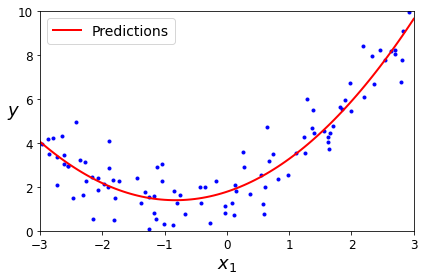

In [43]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) #새로운 샘플 100개
X_new_poly = poly_features.transform(X_new)     #2차 다항 회귀 모델 데이터로 변환
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")                                           #기존 데이터 산점도
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions") #변환 데이터로 예측한 그래프

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()


> `np.linspace(-3, 3, 100).reshape(100, 1)` : -3부터 3까지 균일한 간격으로 100개의 숫자 생성 --> 100행과 1열로 변환

> - 기존 함수: $y = 0.5\cdot x_1^2 + 2 + 가우시안 잡음$
> - 변환된 함수: $y\hat\ = 0.56\cdot x_1^2 + 0.93\cdot x + 1.78$

> 특성 여러 개 -> 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음.
    > PolynomialFeatures가 주어진 차수까지 특성 간의 모든 *교차항*을 추가하기 때문. <br>(ex. degree=3일 때, a^2, a^3, b^2, b^3 뿐 아니라 ab, a^2b, ab^2 도 특성으로 추가)

##### 고차 다항 회귀 모델을 살펴보자.

Saving figure high_degree_polynomials_plot


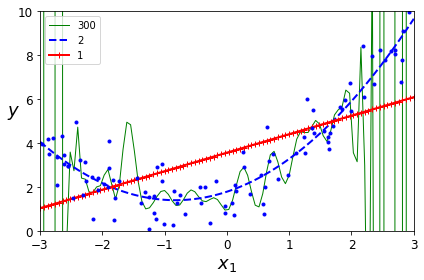

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--",2, 2), ("r-+", 2, 1)):
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()
    

> - 300차 다항 회귀 모델 -> 훈련 데이터에 과대적합
> - 선형(1차) 모델 -> 과소적합
> - 2차 다항 회귀 -> 일반화 가장 good

- 얼마나 복잡한 모델을 사용해야 할지 어떻게 결정할까? ⬇️

## 4.4 학습 곡선 (Learning Curves)
- 얼마나 복잡한 모델을 사용할지를 결정하는 방법
    - 교차 검증 (ch.2)
        - 교차 검증의 점수에 따라 과소적합/과대적합 판정
    - **학습 곡선** : 훈련 세트와 검증 세트의 모델 성능을 비교하는 그래프 --> 변화를 추적
        - 곡선의 모양에 따라 과소적합/과대적합 판정

- 학습 곡선 만들기: 훈련 세트에서 크기가 다른 서브 세트를 만들고, 이 모델을 여러 번 훈련
     - 모델 성능의 변화는 훈련 세트의 크기를 1부터 시작해서 최대값까지 바꾸면서 훈련된 모델의 성능을 훈련 세트와 검증 세트 각각에 대해 측정하는 방식으로 확인한다.

아래 코드는 훈련 세트와 검증 세트에 대한 평균 제곱근 오차(RMSE)의 변화를 추적하는 그래프를 그린다.

##### 📚 2가지 학습 곡선을 그려보자.

- `plot_learning_curves(model, X, y)` 함수 정의 : 모델의 학습 곡선을 그리는 함수

In [45]:
from sklearn.metrics import mean_squared_error      #MSE 계산
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    
    #훈련,검증세트 8:2로 분류
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []                #MSE를 추적할 리스트
    
    #샘플 수만큼 반복
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])  #훈련세트 예측값
        y_val_predict = model.predict(X_val)          #검증세트 예측값
        
        #MSE 계산하여 리스트에 추가
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
        
             #RMSE로 만듦(np.sqrt())
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    

> `random_state=10` : 난수 발생을 고정으로 하여 random_state에 10의 값을 사용할 때마다 매 번 동일한 분할이 유지(재현성)

- 학습 곡선을 그려보자.
    - 훈련 데이터 (빨강)
    - 검증 데이터 (파랑)

##### 1. 일단, 2차 다항식으로 생성된 데이터셋에 대한 선형 회귀 모델의 학습 곡선

Saving figure underfitting_learning_curves_plot


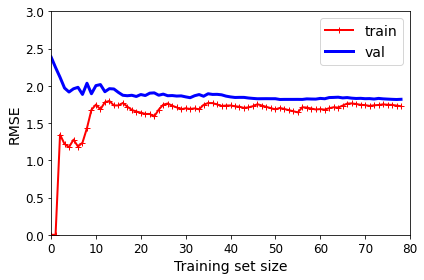

In [46]:
#LinearRegression 모델 사용
lin_reg = LinearRegression() 

plot_learning_curves(lin_reg, X, y)

plt.axis([0, 80, 0, 3])
save_fig("underfitting_learning_curves_plot")
plt.show()

> - 훈련 데이터 성능(빨) : 훈련 세트 사이즈가 커지면서 RMSE 커지지만, 어느 정도 이후엔 더 이상 RMSE 변하지 않음.
> - 검증 데이터 성능(파) : 훈련 세트의 성능과 비슷해짐.

- ➡️ 과소적합 모델
    - 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음.

##### 2. 2차 다항식으로 생성된 데이터셋에 대해 **10차 다항 회귀**를 적용한 선형 회귀 모델

Saving figure learning_curves_plot


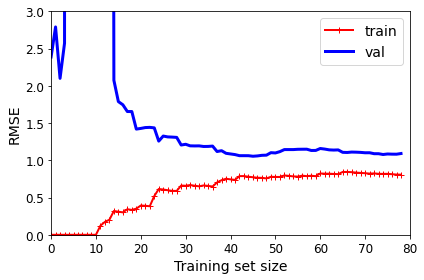

In [47]:
from sklearn.pipeline import Pipeline

#다항 회귀 모델 적용 후 -> 선형 회귀 모델 변경
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig("learning_curves_plot")
plt.show()

> - 훈련 데이터 성능(빨) : 선형 회귀 모델에 비해 **RMSE가 훨씬 낮음**.
> - 검증 데이터 성능(파) : 훈련 데이터 성능과의 차이가 큼.  
    
- ➡️ 과대적합 모델
    - 두 곡선 사이에 공간이 있음. <br>-> 즉, 훈련 데이터 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징

🌎 과대적합 모델을 개선하는 방법 
>검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것

#### 📒 편향/분산 트레이드오프
- 모델의 일반화 오차는 3가지 종류의 오차의 합으로 표현할 수 있다.
<br><br>
1. 편향 (bias, 절편을 뜻하는 편향과 다른 단어)
- 잘못된 가정으로 인한 오차. 예) 2차 데이터를 선형으로 잘못 가정
- 편향이 큰 모델 - 훈련 데이터에 과소적합되기 쉬움.

2. 분산 (variance)
- 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남.
- 자유도가 높은 모델(예. 고차 다항 회귀 모델)이 높은 분산을 가지기 쉬움 -> 과대적합되는 경향이 있음.

3. 줄일 수 없는 오차(irreducible error)
- 데이터 자체에 있는 잡음 때문에 발생
    - 오차를 줄이는 방법: 데이터에서 잡음 제거(데이터 소스 고치거나 이상치 제거)
    
- 모델의 복잡도 커지면 -> 분산⬆️ & 편향⬇️ (복잡도 작아지면 반대) => `트레이드오프`

## 4.5 규제가 있는 선형 모델
- 과대적합을 감소시키는 방법 - 모델을 규제(제한) : 자유도⬇️ -> 과대적합⬇️
    - 다항 회귀 모델을 규제하는 간단한 방법 : **다항식의 차수를 감소**
    - 선형 회귀 모델 규제 : 모델의 가중치를 제한

- 가중치를 제한하는 선형 모델(3)
    - 릿지 회귀
    - 라쏘 회귀
    - 엘라스틱넷

1. 릿지 회귀 (Ridge Regression)
- 규제가 추가된 선형 회귀 버전
- 비용 함수 : $$
\begin{align*}
J(\boldsymbol{\theta}) & = \text{MSE}(\boldsymbol{\theta}) + \dfrac{\alpha}{2}\sum\limits_{i=1}^{n}{\theta_i}^2 \\
& = \text{MSE}(\boldsymbol{\theta}) + \dfrac{\alpha}{2}\left (\theta_1^2 + \cdots + \theta_n^2 \right )
\end{align*}
$$
    - 규제항($\dfrac{\alpha}{2}\sum\limits_{i=1}^{n}{\theta_i}^2$) 비용 함수에 추가 ➡️ 모델의 가중치를 가능한 한 작게 유지하려 노력
    - 하이퍼파라미터($\alpha$) : 모델을 얼마나 규제할지 조절
        - $\alpha$=0 : 규제x, 기본 선형 회귀
        - $\alpha$⬆️ -> 가중치⬇️
    

##### 📙 릿지 회귀 연습

In [48]:
np.random.seed(42)

m = 20                      #훈련 세트 크기
X = 3 * np.random.rand(m,1) #훈련 세트
y = 1 + 0.5 * X + np.random.randn(m,1) / 1.5   #1차 선형 회귀 모델(잡음 추가)
X_new = np.linspace(0, 3, 100). reshape(100,1) #검증 데이터: 0~3 구간에서 균등하게 100개의 데이터를 선택

> `np.linspace(0, 3, 100). reshape(100,1)` : 0부터 3까지 균일한 간격으로 100개의 숫자 생성(1차원 배열) -> 100x1(100개의 행, 1개의 열)의 형태로 재구성

#### 사이킷런의 `Ridge`모델
- **정규방정식**을 사용한 릿지 회귀 적용

1. `solver="cholesky"` : 정규방정식을 이용한 최적의 파라미터 계산

In [49]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")  #규제 강도(alpha)=1
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])                     #입력값(1.5)에 대한 예측값 출력

array([[1.55071465]])

2. `solver="sag"` : 확률적 경사하강법을 지원하는 옵티마이저 중 하나 (SGD의 변종)

In [50]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

#### `SGDRegressor` 모델
- **penalty**(사용할 규제 지정) 하이퍼파라미터를 사용하면 릿지 회귀와 동일하게 작동
    - `penalty="l2"` : SGD가 비용 함수에 가중치 벡터의 l2노름의 제곱을 2로 나눈 규제항을 추가하게 만듦 (=릿지 회귀) 
        - $\theta_1^2 + \cdots + \theta_n^2$

In [51]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46619232])

##### 📚 **alpha(규제 강도)**에 따른 선형 회귀와 다항 회귀 (10차) 그래프를 그려보자.

Saving figure ridge_regression_plot


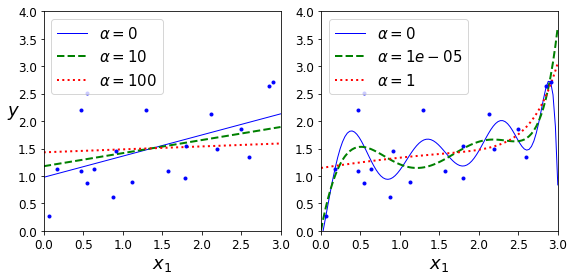

In [52]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
            
        model.fit(X, y)
        
        y_new_regul = model.predict(X_new)
        
        lw = 2 if alpha > 0 else 1
        
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
    
save_fig("ridge_regression_plot")
plt.show()

> $\alpha$ 값 ⬆️ -> 그래프가 **직선**에 가까워짐
> - 즉, 모델의 분산은 줄지만, 편향은 커짐

2. 라쏘 회귀 (Lasso Regression)
- 선형 회귀의 또 다른 규제된 버전
- 비용 함수에 규제항을 더하는 것 까진 (릿지와)동일, but 가중치 벡터의  $\ell_1$노름($\left| \theta_i \right|$)을 사용
    - 비용 함수: $$
\begin{align*}
J(\boldsymbol{\theta}) & = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| \\
& = \text{MSE}(\boldsymbol{\theta}) + \alpha \left (\, \left| \theta_1 \right| + \cdots + \left| \theta_n \right|\, \right )
\end{align*}
$$
<br>
<br>

- 특징: 덜 중요한 특성의 가중치를 제거하려고 함 (**$\left| \theta_i \right|$가 0에 수렴하도록 유도**)
    - 자동으로 특성 선택 ➡️ 희소 모델(sparse model, 입력 데이터의 대다수가 0 또는 매우 작은 값으로 구성)을 만듦


##### 📚 라쏘 회귀와 릿지 회귀를 비교해보자
- 릿지 회귀와 라쏘 회귀의 모델 학습 과정에서 손실함수에 따른 `파라미터 움직임의 특성`을 비교 (경사하강법 적용 시)
    - $\ell_1$노름 vs $\ell_2$노름

In [53]:
#도표에 사용되는 좌표값 모음
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

#각각 500개의 데이터가 담긴 array 생성
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)

#2차원 grid 좌표
t1, t2 = np.meshgrid(t1s, t2s)

#1차원 평탄화 후 concatenate(좌우로 이어붙이기)
T = np.c_[t1.ravel(), t2.ravel()]


Xr = np.array([[1,1], [1,-1], [1,0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

#릿지의 비용함수(J)
J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [54]:
t1.ravel()

array([-1.        , -0.99198397, -0.98396794, ...,  2.98396794,
        2.99198397,  3.        ])

> `np.meshgrid(arr1, arr2)` : 2차원 그리드 좌표 생성 (arr1, arr2 는 모두 1차원 배열)

Saving figure lasso_vs_ridge_plot


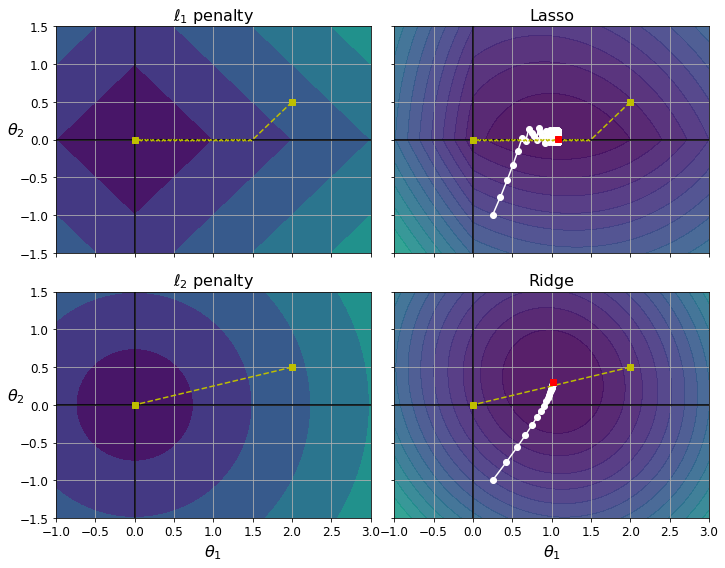

In [55]:
#파라미터(theta) 경로 기억 어레이 생성 함수
def bgd_path(theta, X, y, l1, l2, core = 1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) *  X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta*gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0, 2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]
    
    #좌측 도표 등고선 용도
    levelsN = np.linspace(0, np.max(N), 10)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    
    #라쏘 또는 릿지 회귀 경사하강법 파라미터 경로
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    
    #l1노름 또는 l2노름 경사하강법 경로
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)
    
    #좌측 도표(상단:라쏘, 하단:릿지)
    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k') #x축
    ax.axvline(x=0, color='k') #y축
    ax.contourf(t1, t2, N / 2., levels=levelsN) #등고선
    
    ax.plot(path_N[:, 0], path_N[:, 1], "y--") #노란색 점선
    ax.plot(0, 0, "ys") #원점
    ax.plot(t1_min, t2_min, "ys") #좌표(2,1)
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)
    
    #우측 도표(상단:라쏘, 하단:릿지)
    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k') #x축
    ax.axvline(x=0, color='k') #y축
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9) #등고선
    
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o") #흰색 점실선
    ax.plot(path_N[:, 0], path_N[:, 1], "y--") #노란색 점선
    ax.plot(0, 0, "ys") #원점 표시
    ax.plot(t1_min, t2_min, "ys") #좌표 (2,1)
    ax.plot(t1r_min, t2r_min, "rs") #빨간색 점
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
        
save_fig("lasso_vs_ridge_plot")
plt.show()
    
    

> 그래프 설명 
>> 1. 왼쪽 상단(l1 페널티( $\left| \theta_1 \right| + \left| \theta_2 \right|$) : $\theta_2$가 먼저 0에 도달. 시작할 때 0에 더 가깝기 때문. 그 다음 경사하강법이 $\theta_1$이 0에 도달할 때까지 축을 따라 내려감.(이 지점에서 그레디언트는 -1)
    - -> 중요하지 않은 특성의 가중치를 무시하는 걸 알 수 있음
>> 2. 오른쪽 상단(라쏘 손실 함수, l1을 더한 MSE 손실 함수) : $\theta_2$가 0에 먼저 도달. 그 다음 축을 따라 진동하면서 전역 최적점 근처에 도달
    - -> 전역 최적점에서 계속 진동 (절댓값의 미분이 0에서 정의가 안되기 때문)
>> 3.  왼쪽 하단 (l2 페널티) : 경사하강법이 원점까지 직선 경로를 따라 감소
>> 4. 오른쪽 하단 (릿지 손실 함수, l2을 더한 MSE 손실 함수): 파라미터가 전역 최적점에 도달할수록 그레디언트 작아짐
    - -> 경사하강법 느려지고 수렴하는 데 도움이 됨.(진동이 X)

- 라쏘 사용할 때 경사하강법이 최적점 근처에서 진동하는 것을 막으려면 - 훈련 동안 **점진적으로 학습률을 감소**시켜야 함
    - 여전히 진동은 하겠지만, 스텝이 점점 작아지므로 수렴하게 될 것임

📚 사이킷런의 `Lasso`모델 예제

In [56]:
from sklearn.linear_model import Lasso
 
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

3. 엘라스틱넷 (Elastic net)
- 릿지 회귀 & 라쏘 회귀를 절충한 모델
- 규제항 = 릿지의 규제항 + 라쏘의 규제항 (혼합 비율 r로 조절)
- 비용함수: $
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$
    - $\sum\limits_{i=1}^{n}\left| \theta_i \right|$ : 라쏘 규제항
    - $\sum\limits_{i=1}^{n}{{\theta_i}^2}$ : 릿지 규제항

📚 사이킷런의 `ElasticNet` 모델 예제

In [57]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### 4.5.4 조기 종료
 - 반복적인 학습 알고리즘 규제 방법
     - 검증 에러가 최솟값에 도달하면, **즉시** 훈련 중지 
 - 최솟값 도달 확인이 안되는 경우 (SGD, MGD,,,)
     - 검증 에러가 일정 시간 동안 최솟값보다 클 때(모델이 더 이상 최적화되지 않음) ➡️ 학습 중단 & 검증 에러가 최소였을 때의 모델 파라미터로 되돌림

📚 조기 종료 규제 예제
 - `SGDRegressor` 모델 사용

In [58]:
np.random.seed(42)
m = 100                                          #데이터셋 크기
X = 6 * np.random.rand(m, 1) - 3                 #무작위로 100개
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)   #타깃 100개 (2차 다항식, 잡음 섞임)

# 훈련 세트, 검증 세트 분할 (5:5)
X_train, X_val, y_train, y_val = train_test_split(X[:50],y[:50].ravel(), test_size=0.5, random_state=10)

In [68]:
from copy import deepcopy 

#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#SGD 모델 사용
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf") #최솟
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict) #MSE 계산
    
    #검증 에러가 최솟값에 도달할 때까지 실행 (전역 최적점) -> 가장 좋은 성능 찾기
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

> `max_iter=1` : 한 번의 에포크마다 모델 한 번 훈련 <br>
> `warm_start=True`: fit 호출할 때마다 이전 모델의 가중치 초기화하지 않고 그대로 훈련을 이어감 <br>
> `penalty=None` : 규제 사용 X <br>
> `learning_rate="constant"` : 학습률 일정하게(eta0으로) 유지. 

- 검증 에러와 훈련 에러 측정 그래프 그리기

Saving figure early_stopping_plot


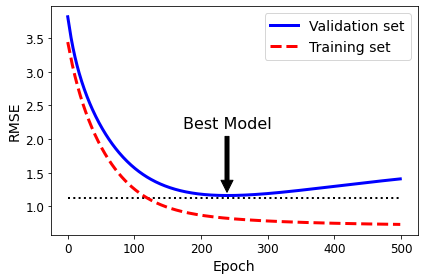

In [69]:
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

#epoch 최대 500개
n_epochs = 500

train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])


plt.annotate('Best Model',
            xy=(best_epoch, best_val_rmse),
            xytext=(best_epoch, best_val_rmse + 1),
            ha="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            )

best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")  #검증 에러: 파란색 실선
plt.plot(np.sqrt(train_errors), "r--", linewidth=3, label="Training set") #훈련 에러: 빨간색 점선

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

> epoch 마다 훈련 세트 & 검증 세트의 성능(RMSE) 측정
> - 최솟값 후에 검증 에러 증가 --> **"과대적합"** 시작
    - 조기 종료로 규제 해야 함

In [70]:
#가장 좋은 성능
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=None, warm_start=True))